<a href="https://colab.research.google.com/github/KanhuPadhy/Artificial-Intelligence/blob/main/Copy_of_14_12_2024_CNN_handson_by_Tanmay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shark Species Detection Using CNN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from PIL import Image            # PIL  - Python Image Library

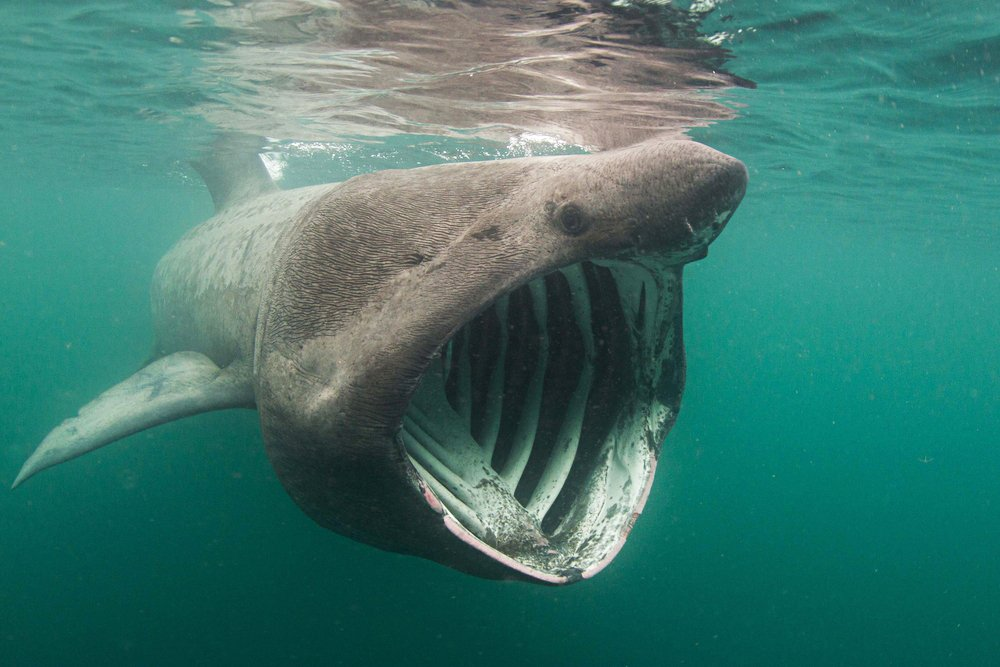

In [ ]:
img1=Image.open("/content/drive/MyDrive/sharks images/Sharks/basking/00000004.jpg")
img1

In [ ]:
img1.size

(1000, 667)

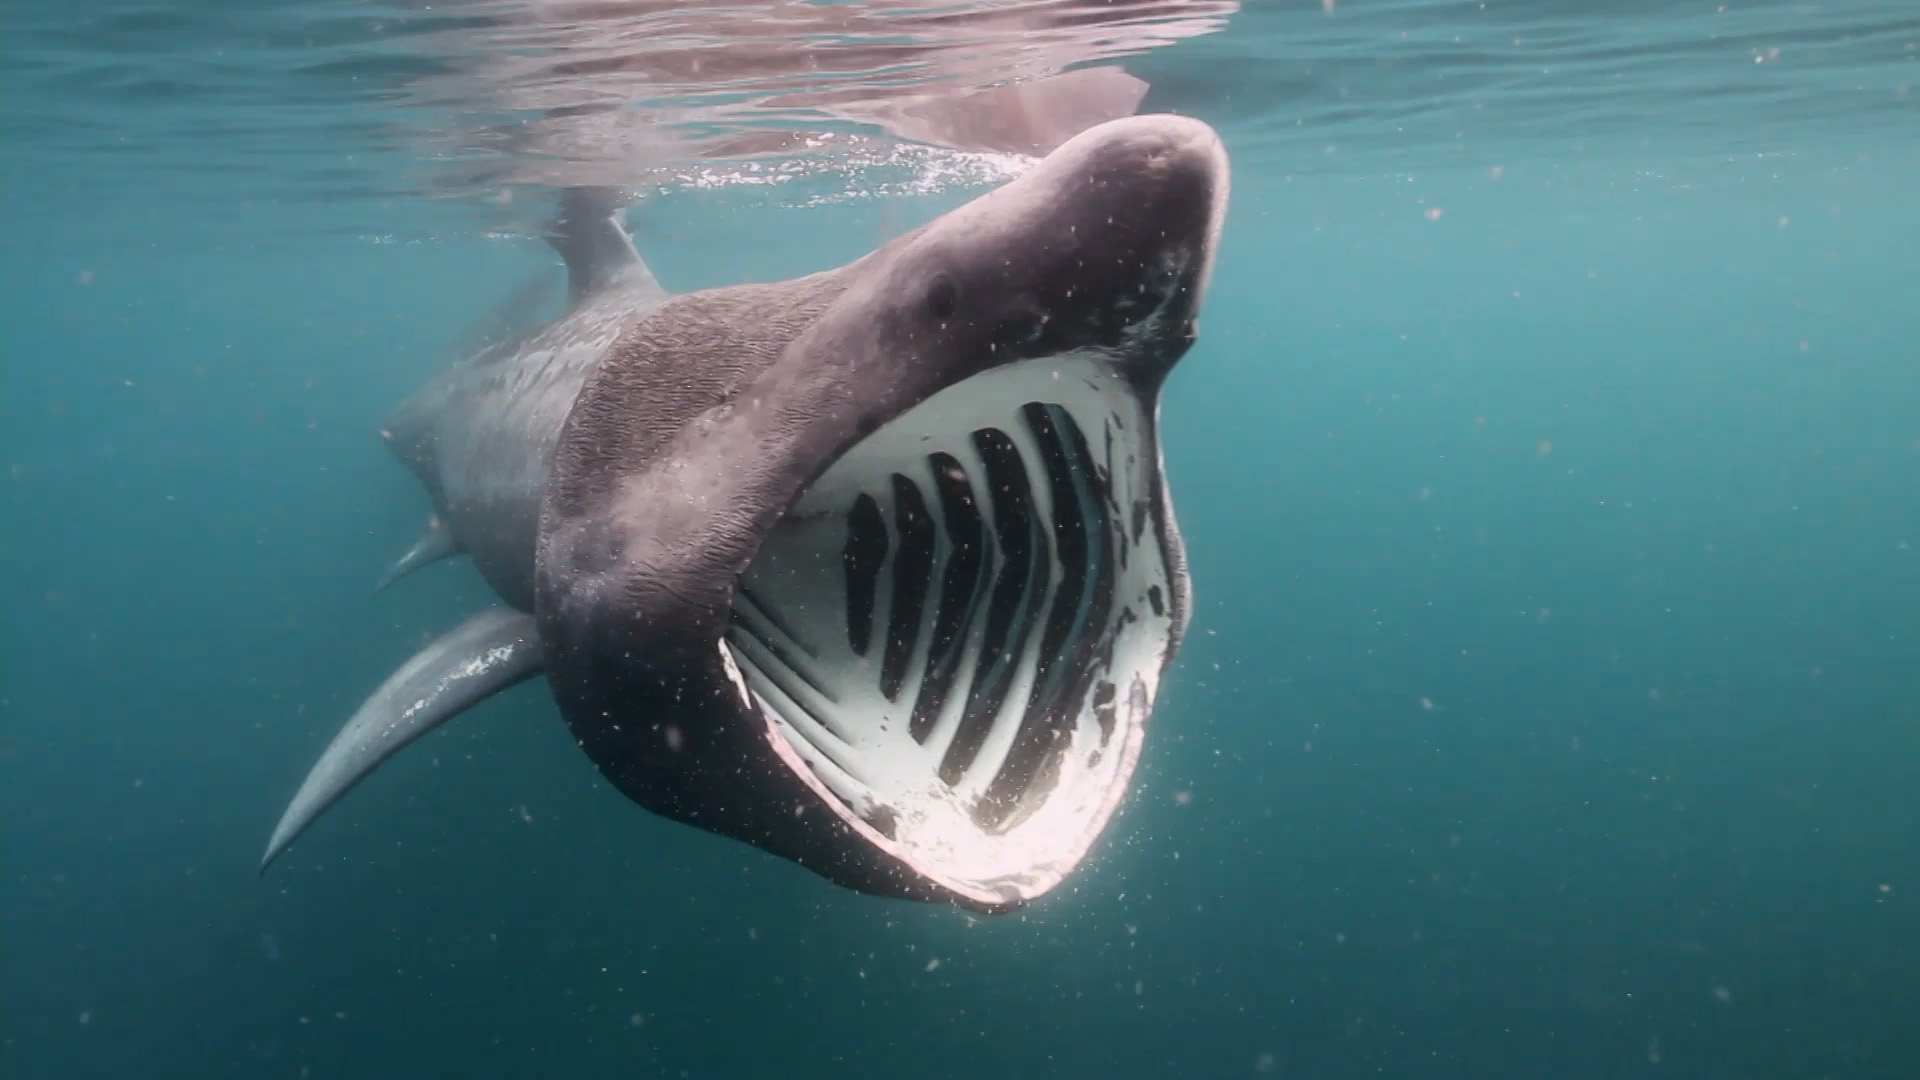

In [ ]:
img2=Image.open("/content/drive/MyDrive/sharks images/Sharks/basking/00000001.jpg")
img2

In [ ]:
img2.size

(1920, 1080)

In [ ]:
# Steps of Image processing
#Resizing the Image

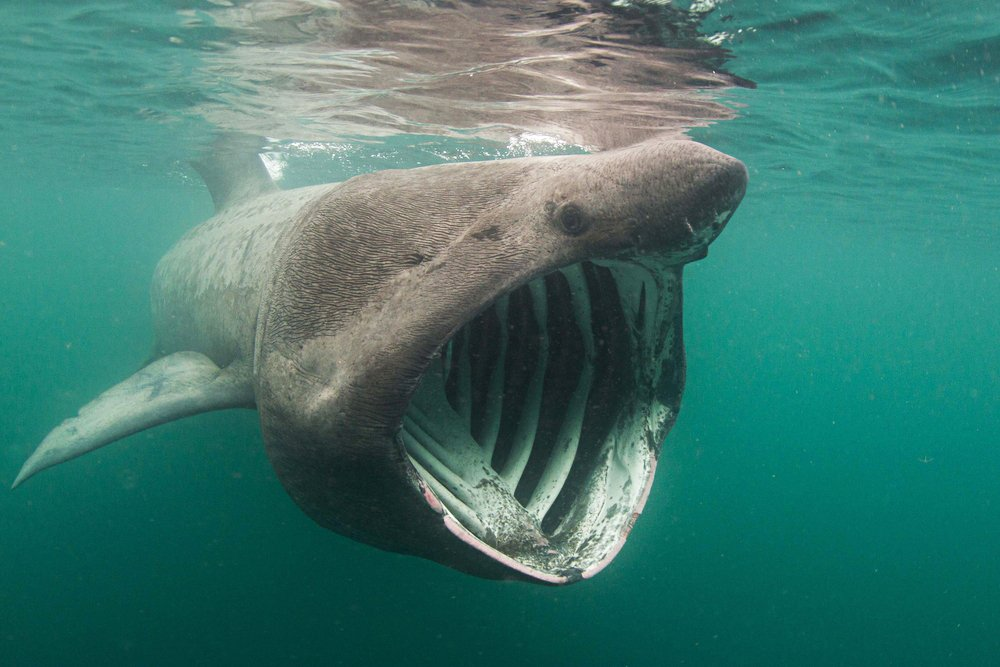

In [ ]:
img1

In [ ]:
img1=np.resize(img1,(200,200,3))

array([[[ 61, 132, 126],
        [ 61, 132, 126],
        [ 61, 132, 126],
        ...,
        [ 69, 133, 117],
        [ 70, 134, 118],
        [ 75, 137, 122]],

       [[ 78, 136, 124],
        [ 75, 131, 120],
        [ 80, 131, 126],
        ...,
        [134, 136, 125],
        [133, 136, 125],
        [133, 139, 127]],

       [[130, 136, 126],
        [134, 142, 131],
        [134, 142, 131],
        ...,
        [ 78,  81,  90],
        [ 76,  80,  89],
        [ 76,  80,  89]],

       ...,

       [[134, 122, 124],
        [127, 115, 117],
        [118, 106, 108],
        ...,
        [105,  99, 109],
        [129, 123, 133],
        [128, 123, 130]],

       [[ 90,  85,  92],
        [ 83,  80,  87],
        [ 76,  73,  80],
        ...,
        [ 70, 137, 130],
        [ 65, 130, 124],
        [ 63, 130, 123]],

       [[ 61, 130, 125],
        [ 65, 136, 130],
        [ 64, 135, 129],
        ...,
        [ 41, 106, 102],
        [ 41, 103, 100],
        [ 39, 101,  98]]], dtype=uint8)
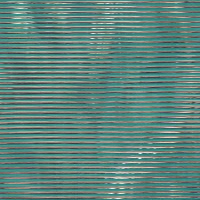

In [ ]:
img1

In [ ]:
# Normalize the images
img1=img1/255

In [ ]:
img1

array([[[0.23921569, 0.51764706, 0.49411765],
        [0.23921569, 0.51764706, 0.49411765],
        [0.23921569, 0.51764706, 0.49411765],
        ...,
        [0.27058824, 0.52156863, 0.45882353],
        [0.2745098 , 0.5254902 , 0.4627451 ],
        [0.29411765, 0.5372549 , 0.47843137]],

       [[0.30588235, 0.53333333, 0.48627451],
        [0.29411765, 0.51372549, 0.47058824],
        [0.31372549, 0.51372549, 0.49411765],
        ...,
        [0.5254902 , 0.53333333, 0.49019608],
        [0.52156863, 0.53333333, 0.49019608],
        [0.52156863, 0.54509804, 0.49803922]],

       [[0.50980392, 0.53333333, 0.49411765],
        [0.5254902 , 0.55686275, 0.51372549],
        [0.5254902 , 0.55686275, 0.51372549],
        ...,
        [0.30588235, 0.31764706, 0.35294118],
        [0.29803922, 0.31372549, 0.34901961],
        [0.29803922, 0.31372549, 0.34901961]],

       ...,

       [[0.5254902 , 0.47843137, 0.48627451],
        [0.49803922, 0.45098039, 0.45882353],
        [0.4627451 , 0

In [ ]:
os.listdir("/content/drive/MyDrive/sharks images/Sharks/basking/")

['00000000.jpg',
 '00000002.jpg',
 '00000004.jpg',
 '00000003.jpg',
 '00000001.jpg',
 '00000015.jpg',
 '00000018.jpg',
 '00000005.jpg',
 '00000012.jpg',
 '00000016.jpg',
 '00000010.jpg',
 '00000008.jpg',
 '00000011.jpg',
 '00000006.jpg',
 '00000017.JPG',
 '00000019.jpg',
 '00000013.jpg',
 '00000007.jpg',
 '00000014.jpg',
 '00000009.jpg',
 '00000058.jpg',
 '00000020.jpg',
 '00000064.JPG',
 '00000045.jpg',
 '00000049.jpg',
 '00000044.jpg',
 '00000074.jpg',
 '00000082.jpg',
 '00000087.jpg',
 '00000055.jpg',
 '00000022.jpg',
 '00000073.jpg',
 '00000027.jpg',
 '00000076.jpg',
 '00000077.jpg',
 '00000090.jpg',
 '00000024.jpg',
 '00000083.jpg',
 '00000094.jpg',
 '00000032.jpg',
 '00000095.jpg',
 '00000065.jpg',
 '00000081.jpg',
 '00000084.jpg',
 '00000025.jpg',
 '00000050.jpg',
 '00000023.jpg',
 '00000066.jpg',
 '00000039.jpg',
 '00000042.jpg',
 '00000085.jpg',
 '00000079.jpg',
 '00000089.jpg',
 '00000062.jpg',
 '00000038.jpg',
 '00000070.jpg',
 '00000053.jpg',
 '00000030.jpg',
 '00000063.jpg

In [ ]:
os.path.join("Hello","Hi","Bye")

'Hello/Hi/Bye'

In [ ]:
common_path="/content/drive/MyDrive/sharks images/Sharks/"

In [ ]:
os.listdir(common_path)

['basking', 'blacktip', 'blue']

In [ ]:
def get_image_path(common_path):
  labels=[]
  image_paths_list=[]
  for i in os.listdir(common_path):
    for image_name in os.listdir(os.path.join(common_path,i)):
      img_path=os.path.join(common_path,i,image_name)
      image_paths_list.append(img_path)
      labels.append(i)
  return image_paths_list,labels


In [ ]:
# os.path.join(common_path,"basking",'00000000.jpg')

In [ ]:
# os.listdir(os.path.join(common_path,"basking"))

In [ ]:
path_lists,labels=get_image_path(common_path)

In [ ]:
path_lists

['/content/drive/MyDrive/sharks images/Sharks/basking/00000000.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000002.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000004.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000003.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000001.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000015.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000018.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000005.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000012.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000016.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000010.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000008.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000011.jpg',
 '/content/drive/MyDrive/sharks images/Sharks/basking/00000006.jpg',
 '/content/drive/MyDrive/sharks im

In [ ]:
labels # dependent

['basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'ba

In [ ]:
textual_images=[]
for path in path_lists:
  img=Image.open(path)
  img=np.resize(img,(200,200,3))
  # Normalize the images
  img=img/255
  textual_images.append(img)

In [ ]:
textual_images

[array([[[0.00392157, 0.47843137, 0.55294118],
         [0.01568627, 0.49019608, 0.56470588],
         [0.01176471, 0.48627451, 0.56078431],
         ...,
         [0.18039216, 0.42352941, 0.50588235],
         [0.18823529, 0.42745098, 0.50196078],
         [0.17647059, 0.41568627, 0.49019608]],
 
        [[0.15294118, 0.4       , 0.47058824],
         [0.16862745, 0.41568627, 0.48627451],
         [0.18039216, 0.43921569, 0.50196078],
         ...,
         [0.87058824, 0.89803922, 0.92156863],
         [0.88627451, 0.90588235, 0.92156863],
         [0.92156863, 0.9372549 , 0.94901961]],
 
        [[0.9372549 , 0.94509804, 0.93333333],
         [0.95686275, 0.96078431, 0.94117647],
         [0.95686275, 0.96078431, 0.94117647],
         ...,
         [0.2       , 0.52156863, 0.60392157],
         [0.2       , 0.52156863, 0.60392157],
         [0.2       , 0.52156863, 0.60392157]],
 
        ...,
 
        [[0.40784314, 0.49803922, 0.55294118],
         [0.40784314, 0.49411765, 0.54901

In [ ]:
np.array(textual_images).shape

(314, 200, 200, 3)

In [ ]:
textual_images  # independent data

# **Model Implementation for Shark Species Recogination**

In [ ]:
#Converting the textual Images list into array

In [ ]:
X=np.array(textual_images)
X   #Independent

array([[[[0.00392157, 0.47843137, 0.55294118],
         [0.01568627, 0.49019608, 0.56470588],
         [0.01176471, 0.48627451, 0.56078431],
         ...,
         [0.18039216, 0.42352941, 0.50588235],
         [0.18823529, 0.42745098, 0.50196078],
         [0.17647059, 0.41568627, 0.49019608]],

        [[0.15294118, 0.4       , 0.47058824],
         [0.16862745, 0.41568627, 0.48627451],
         [0.18039216, 0.43921569, 0.50196078],
         ...,
         [0.87058824, 0.89803922, 0.92156863],
         [0.88627451, 0.90588235, 0.92156863],
         [0.92156863, 0.9372549 , 0.94901961]],

        [[0.9372549 , 0.94509804, 0.93333333],
         [0.95686275, 0.96078431, 0.94117647],
         [0.95686275, 0.96078431, 0.94117647],
         ...,
         [0.2       , 0.52156863, 0.60392157],
         [0.2       , 0.52156863, 0.60392157],
         [0.2       , 0.52156863, 0.60392157]],

        ...,

        [[0.40784314, 0.49803922, 0.55294118],
         [0.40784314, 0.49411765, 0.54901961]

In [ ]:
# Encoding the target
labels

['basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'basking',
 'ba

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
y=le.fit_transform(labels)
y   # Dependent

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# Splitting the data into train test split
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
x_train.shape

(219, 200, 200, 3)

In [ ]:
y_train.shape

(219,)

In [ ]:
x_test.shape


(95, 200, 200, 3)

In [ ]:
y_test.shape


(95,)

**Implementation of CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()
#First Convolution layer (input layer)
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))
#Second Convolution layer
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
#Third Convolution Layer
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
# Flatten layer
model.add(Flatten())
#Hidden Layer  (Fully Connected Layer)
model.add(Dense(128,activation="relu"))
#Output Layer
model.add(Dense(3,activation="softmax")) # No of nodes should be = no. of unique classes in the target


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.2941 - loss: 2.1991 - val_accuracy: 0.3053 - val_loss: 1.0944
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.3731 - loss: 1.0920 - val_accuracy: 0.4105 - val_loss: 1.0636
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.3744 - loss: 1.0712 - val_accuracy: 0.4000 - val_loss: 1.0772
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.4196 - loss: 1.0505 - val_accuracy: 0.3895 - val_loss: 1.0769
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.4155 - loss: 1.0407 - val_accuracy: 0.4000 - val_loss: 1.0745
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4437 - loss: 1.0354 - val_accuracy: 0.3895 - val_loss: 1.0546
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.4702 - loss: 1.0788 - val_accuracy: 0.3789 - val_loss: 1.0477
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.4630 - loss: 1.0328 - val_accuracy: 0.4105 - val_loss: 1.0415
Epoch 9/